In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
pip install pyforest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pyforest import*
lazy_imports()

['import plotly as py',
 'import matplotlib as mpl',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.preprocessing import MinMaxScaler',
 'from dask import dataframe as dd',
 'from sklearn.linear_model import RidgeCV',
 'import altair as alt',
 'import pydot',
 'import matplotlib.pyplot as plt',
 'import statsmodels.api as sm',
 'from sklearn.ensemble import RandomForestRegressor',
 'import dash',
 'import cv2',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.impute import SimpleImputer',
 'import sys',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import LinearRegression',
 'import imutils',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn import svm',
 'import re',
 'import lightgbm as lgb',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import pickle',
 'from sklearn.model_selection import GridSearchCV',
 'from pyspark import SparkContext',
 'import datetime as dt',
 'from sklear

In [2]:
db=pd.read_excel("F:/cementStrengthPrediction/Concrete_Data.xls")
db

<IPython.core.display.Javascript object>

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
db.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age (day)                          int64
Concrete compressive strength    float64
dtype: object

In [4]:
db.shape

(1030, 9)

In [5]:
#checking for any missing value
db.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age (day)                        0
Concrete compressive strength    0
dtype: int64

In [6]:
db.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
# EXPLORATORY DATA ANALYSIS FOR CEMENT:

In [8]:
db.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

In [9]:
from scipy import stats

Q1=db['Cement '].quantile(q=0.25)
Q3=db['Cement '].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(db['Cement ']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [10]:
# Outlier detection from Interquartile range (IQR) in original data:
lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',lower_outliers)
print('Upper outlier limit in cement: ',upper_outliers)


Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [11]:
# Checking for presence of any outliers with the upper and lower limits:
print("number of upper outliers in cement is :",db[db['Cement ']>586.4375]['Cement '].count())
print("number of lower outliers in cement is :",db[db['Cement ']<-44.0625]['Cement '].count())
print('% of lower Outlier in cement : ', round(db[db['Cement ']<-44.0625]['Cement '].count()*100/len(db)))
print('% of upper Outlier in cement : ', round(db[db['Cement ']>586.4375]['Cement '].count()*100/len(db)))

number of upper outliers in cement is : 0
number of lower outliers in cement is : 0
% of lower Outlier in cement :  0
% of upper Outlier in cement :  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Cement '>

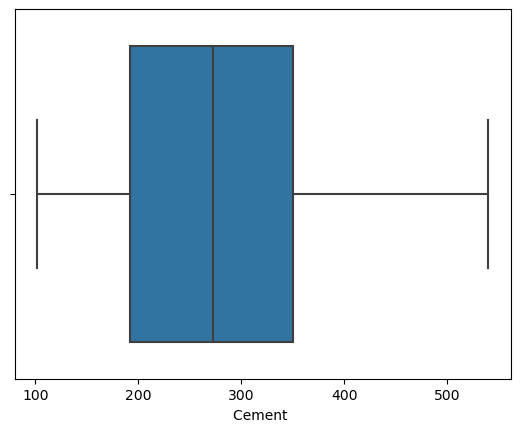

In [12]:
#Distribution of CEMENT data

sns.boxplot(x='Cement ',data=db, orient='h')

In [13]:
# EXPLORATORY DATA ANALYSIS FOR "Water":

In [14]:
from scipy import stats
W_Q1=db['Water  '].quantile(q=0.25)
W_Q3=db['Water  '].quantile(q=0.75)
print("first quartile for water :",W_Q1)
print("third quartile for water :",W_Q3)


first quartile for water : 164.9
third quartile for water : 192.0


In [ ]:
#Outlier detection for water: 

In [15]:
lower_outlier_water=W_Q1-1.5*(W_Q3-W_Q1)
upper_outlier_water=W_Q3+1.5*(W_Q3-W_Q1)
print("lower outlier for water :",lower_outlier_water)
print("upper outlier for water :",upper_outlier_water)

lower outlier for water : 124.25000000000001
upper outlier for water : 232.64999999999998


In [16]:
# Checking for presence of any outliers with the upper and lower limits:
print("number of upper outliers in water column :", db[db['Water  ']>232.64999999999998]
     ['Water  '].count())
print("number of lower outliers in water column :", db[db['Water  ']<124.25000000000001]
     ['Water  '].count())

number of upper outliers in water column : 4
number of lower outliers in water column : 5


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Water  '>

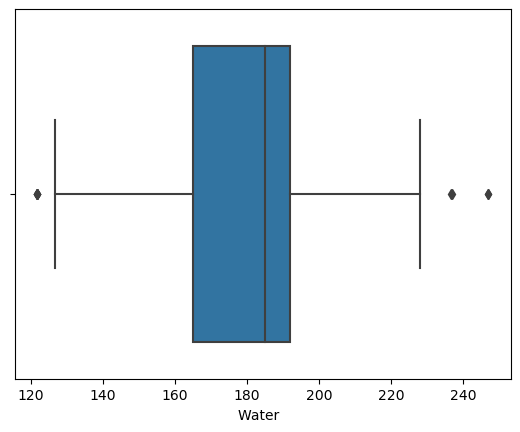

In [17]:
#Distribution of WATER data:
sns.boxplot(x='Water  ',data=db, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WATER')

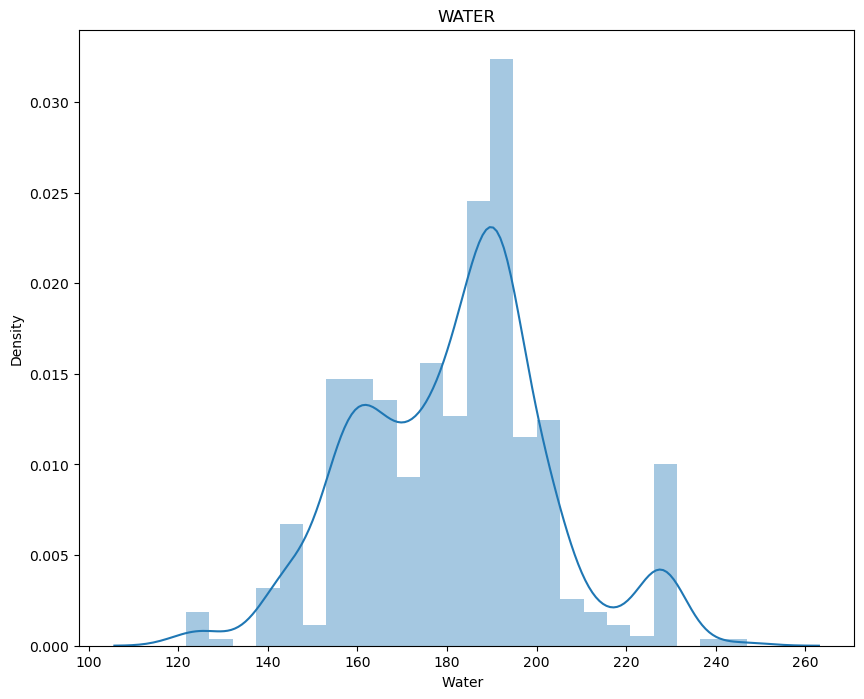

In [18]:
plt.figure(figsize=(10,8))
sns.distplot(db['Water  ']).set_title("WATER")

In [19]:
# EXPLORATORY DATA ANALYSIS FOR "Blast Furnace Slag":

In [20]:
slag_Q1=db['Blast Furnace Slag'].quantile(q=.25)
slag_Q3=db['Blast Furnace Slag'].quantile(q=.75)
print("first quartile for Blast Furnace Slag :",slag_Q1)
print("third quartile for Blast Furnace Slag :",slag_Q3)

first quartile for Blast Furnace Slag : 0.0
third quartile for Blast Furnace Slag : 142.95


In [21]:
lower_outliers_slag=slag_Q1-1.5*(slag_Q3-slag_Q1)
upper_outliers_slag=slag_Q3+1.5*(slag_Q3-slag_Q1)
print("lower outlier for slag :",lower_outliers_slag)
print("upper outlier for slag :",upper_outliers_slag)

lower outlier for slag : -214.42499999999998
upper outlier for slag : 357.375


In [22]:
# Checking for presence of any outliers in "Blast Furnace Slag" :
print("number of lower outliers in Blast Furnace Slag",db[db['Blast Furnace Slag']<-214.42499999999998]
      ['Blast Furnace Slag'].count())
print("number of upper outliers in Blast Furnace Slag",db[db['Blast Furnace Slag']>357.375]
      ['Blast Furnace Slag'].count())

number of lower outliers in Blast Furnace Slag 0
number of upper outliers in Blast Furnace Slag 2


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Blast Furnace Slag'>

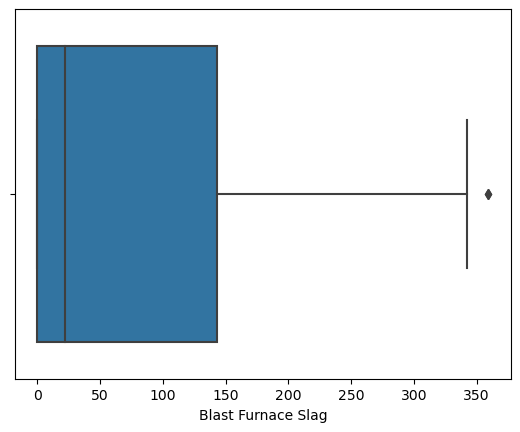

In [23]:
#distribution of slag data:
sns.boxplot(x='Blast Furnace Slag',data=db, orient='h')


In [24]:
# EXPLORATORY DATA ANALYSIS FOR "AGE":

In [25]:
age_Q1=db['Age (day)'].quantile(q=.25)
age_Q3=db['Age (day)'].quantile(q=.75)
print("first quartile of AGE column :",age_Q1)
print("third quartile of AGE column :",age_Q3)

first quartile of AGE column : 7.0
third quartile of AGE column : 56.0


In [26]:
lower_outliers_age=age_Q1-1.5*(age_Q3-age_Q1)
upper_outliers_age=age_Q3+1.5*(age_Q3-age_Q1)
print("lower outlier of age column :",lower_outliers_age)
print("upper outlier of age column :",upper_outliers_age)

lower outlier of age column : -66.5
upper outlier of age column : 129.5


In [27]:
#Checking for presence of any outliers in "AGE":
print("the number of lower outliers in AGE column :",db[db['Age (day)']<-66.5]['Age (day)'].count())
print("the number of upper outliers in AGE column :",db[db['Age (day)']>129.5]['Age (day)'].count())

the number of lower outliers in AGE column : 0
the number of upper outliers in AGE column : 59


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Age (day)'>

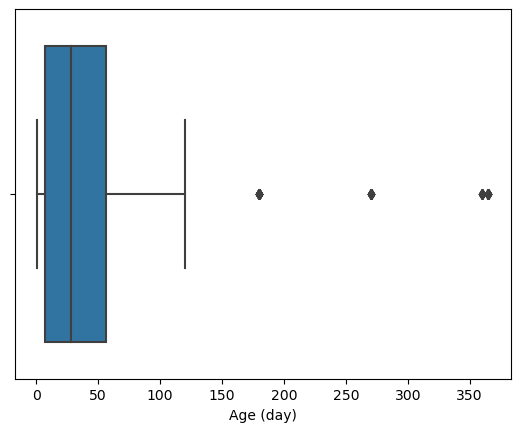

In [28]:
#distribution of AGE data:
sns.boxplot(x='Age (day)',data=db, orient='h')

In [29]:
# EXPLORATORY DATA ANALYSIS FOR "Fly ash":

In [30]:
ash_Q1=db['Fly Ash'].quantile(q=.25)
ash_Q3=db['Fly Ash'].quantile(q=.75)
print("first quartile of Fly ash column :",ash_Q1)
print("third quartile of Fly ash column :",ash_Q3)

first quartile of Fly ash column : 0.0
third quartile of Fly ash column : 118.27


In [31]:
#Checking for presence of any outliers in "Fly ash" column :
ash_lower_quartile=ash_Q1-1.5*(ash_Q3-ash_Q1)
ash_upper_quartile=ash_Q3+1.5*(ash_Q3-ash_Q1)
print("the number of lower outliers in fly ash column : ",db[db['Fly Ash']<ash_lower_quartile]['Fly Ash'].count())
print("the number of upper outliers in fly ash column : ",db[db['Fly Ash']>ash_upper_quartile]['Fly Ash'].count())

the number of lower outliers in fly ash column :  0
the number of upper outliers in fly ash column :  0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Fly Ash'>

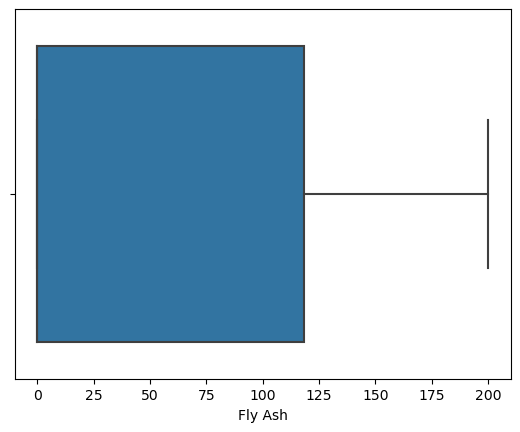

In [32]:
#distribution of "Fly ash" data:
sns.boxplot(x='Fly Ash',data=db, orient='h')

In [33]:
# DOING MULTIVARIATE ANALYSIS OF ALL THE COLUMNS:

In [34]:
db.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Concrete compressive strength', ylabel='Density'>

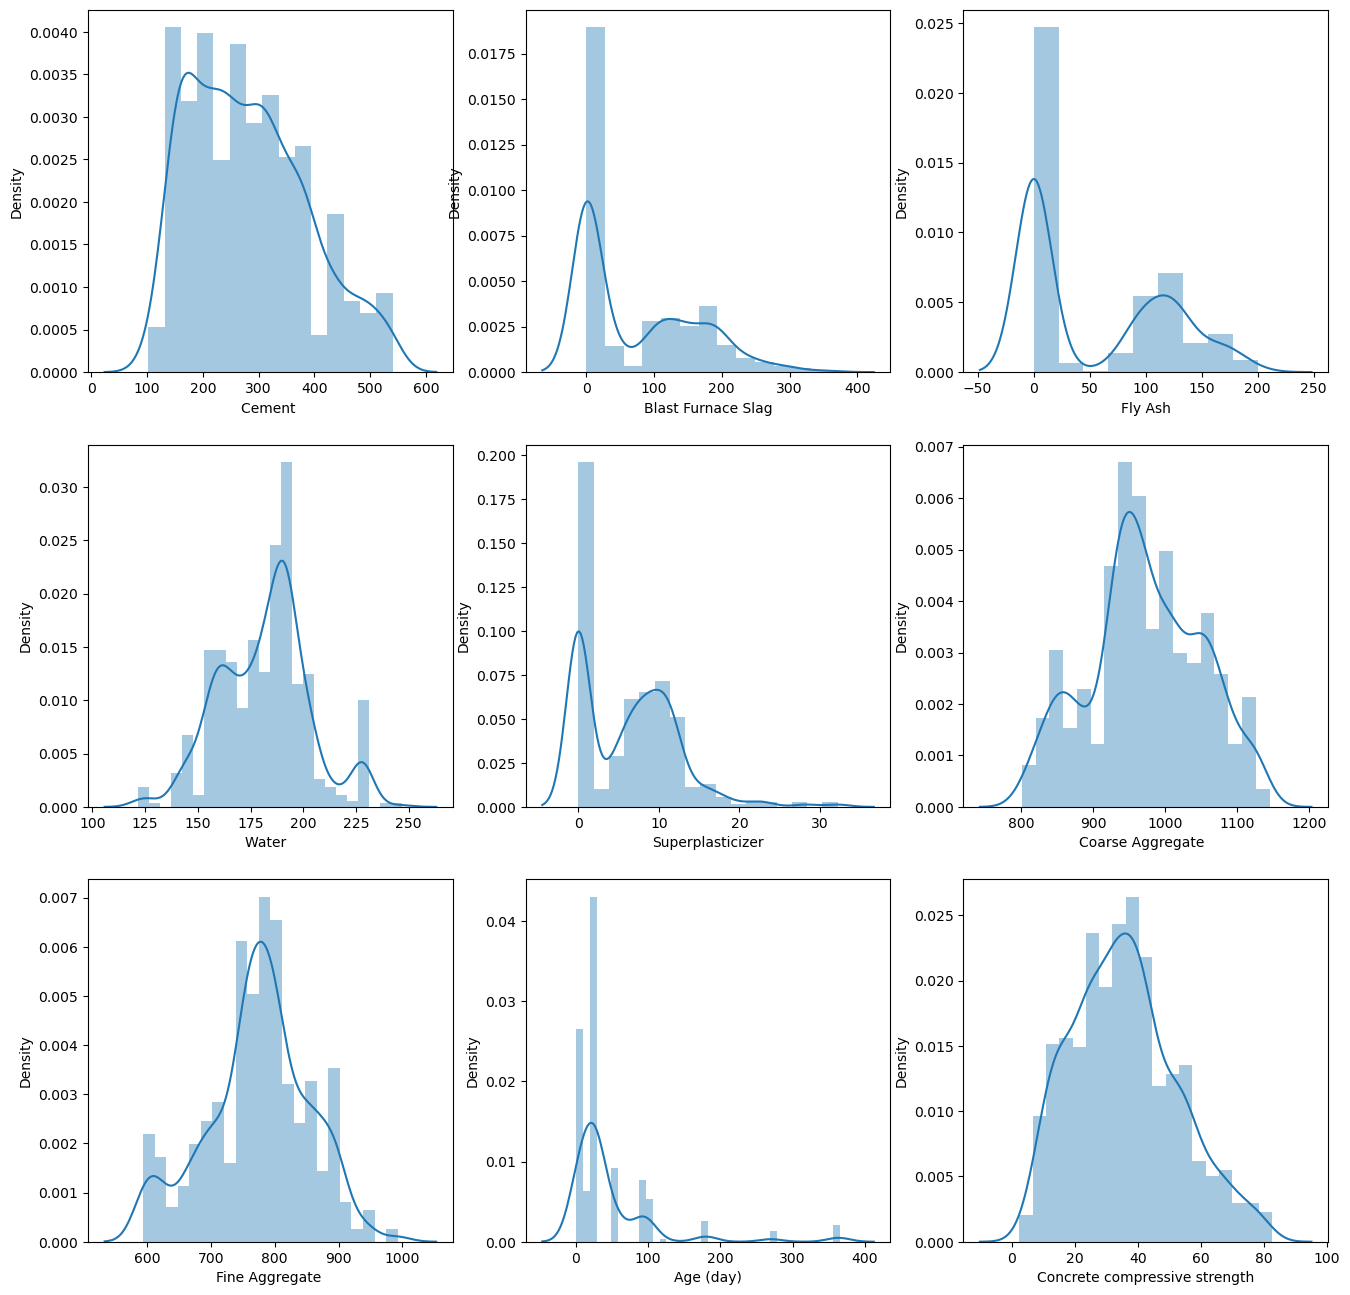

In [35]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(db['Cement '],ax=ax2[0][0])
sns.distplot(db['Blast Furnace Slag'],ax=ax2[0][1])
sns.distplot(db['Fly Ash'],ax=ax2[0][2])
sns.distplot(db['Water  '],ax=ax2[1][0])
sns.distplot(db['Superplasticizer'],ax=ax2[1][1])
sns.distplot(db['Coarse Aggregate  '],ax=ax2[1][2])
sns.distplot(db['Fine Aggregate '],ax=ax2[2][0])
sns.distplot(db['Age (day)'],ax=ax2[2][1])
sns.distplot(db['Concrete compressive strength'],ax=ax2[2][2])

In [36]:
# pairplot to see the Multi-Collineraity between any parameters:
#plot density curve instead of histogram in the diagonals

<IPython.core.display.Javascript object>

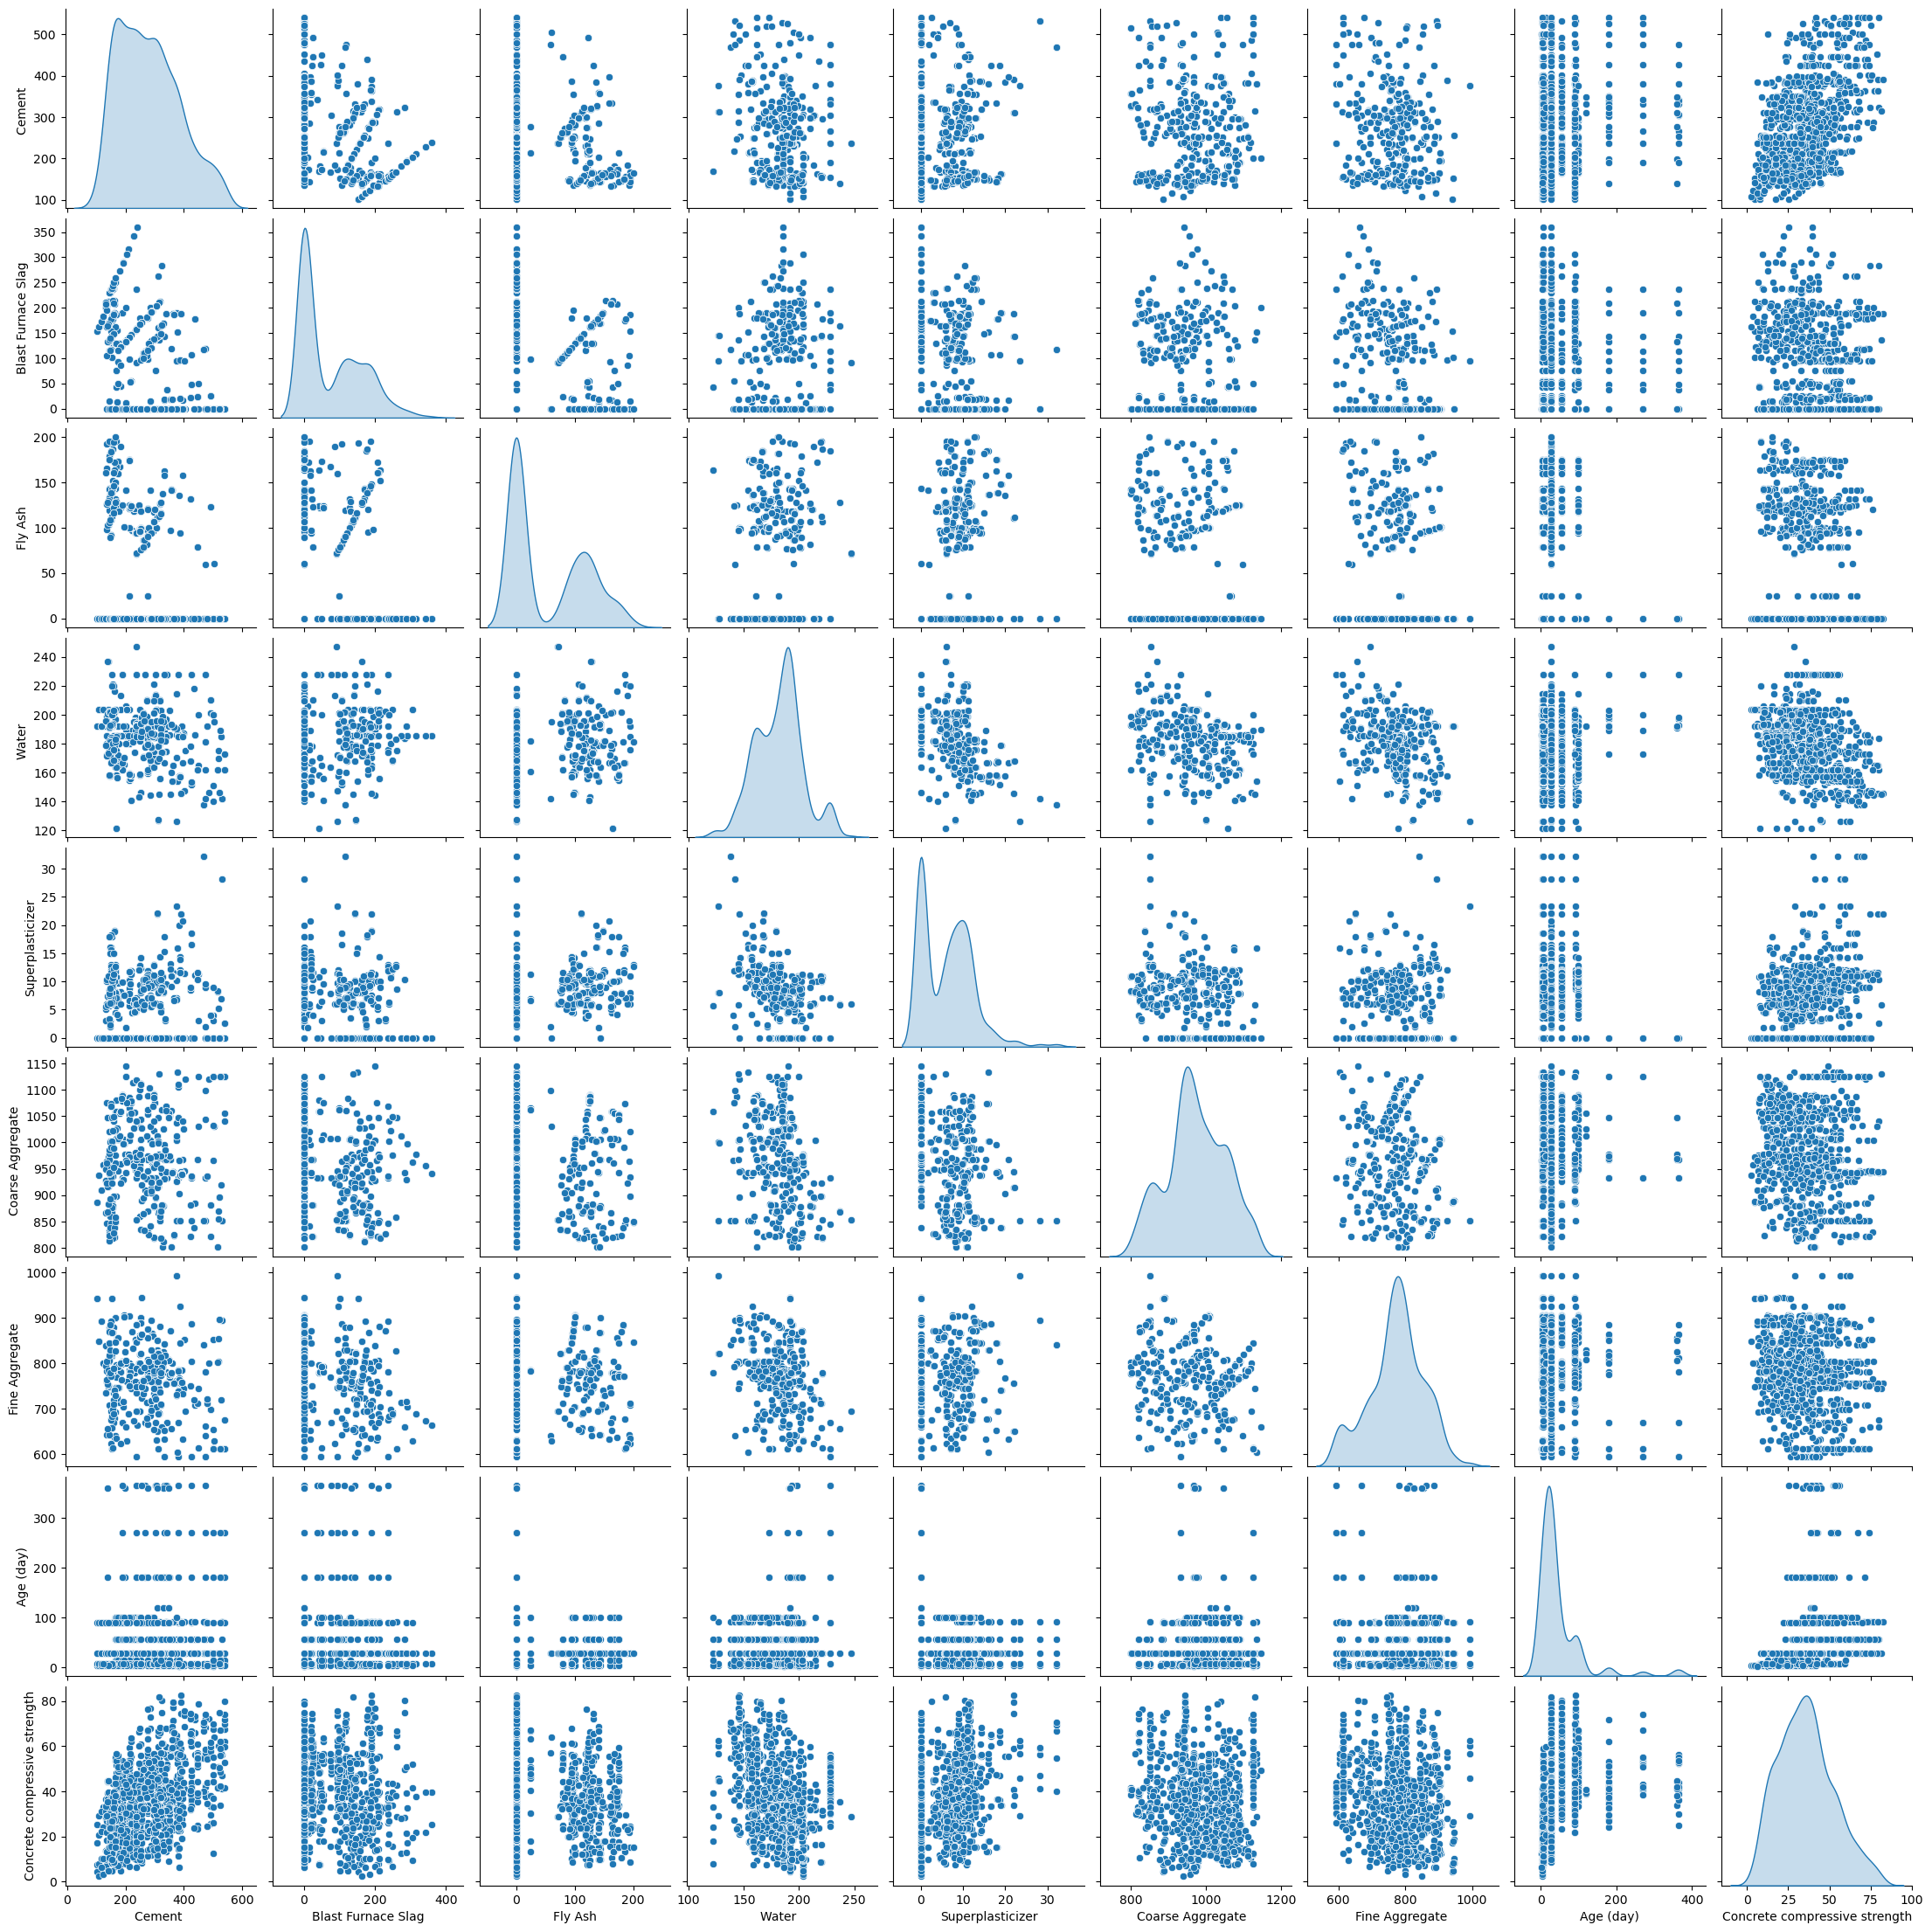

In [37]:
sns.pairplot(db, diag_kind='kde')

In [ ]:
# ANOTHER WAY OF CHECKING CORRELATION BETWEEN VARIABLES : 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

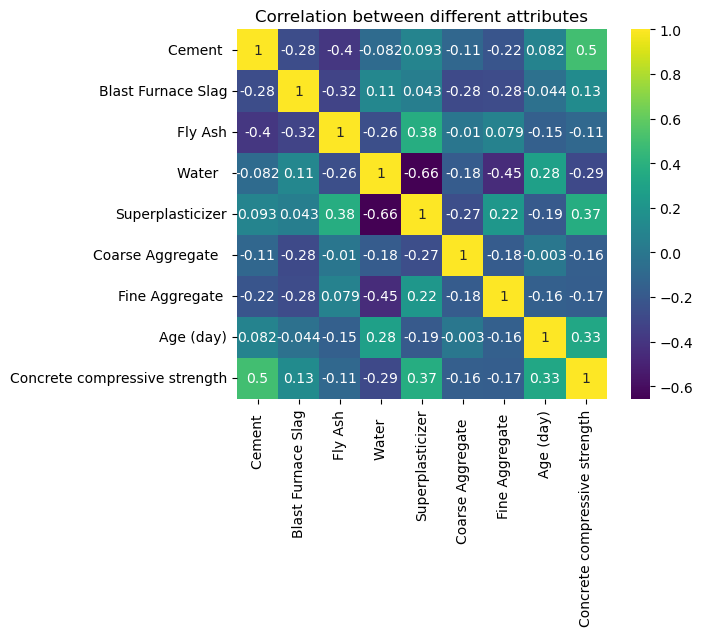

In [38]:
sns.heatmap(db.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [ ]:
# ANOTHER WAY FOR DETECTING OUTLIERS THAT ARE PRESENT IN OUR DATA-SET :

<AxesSubplot:>

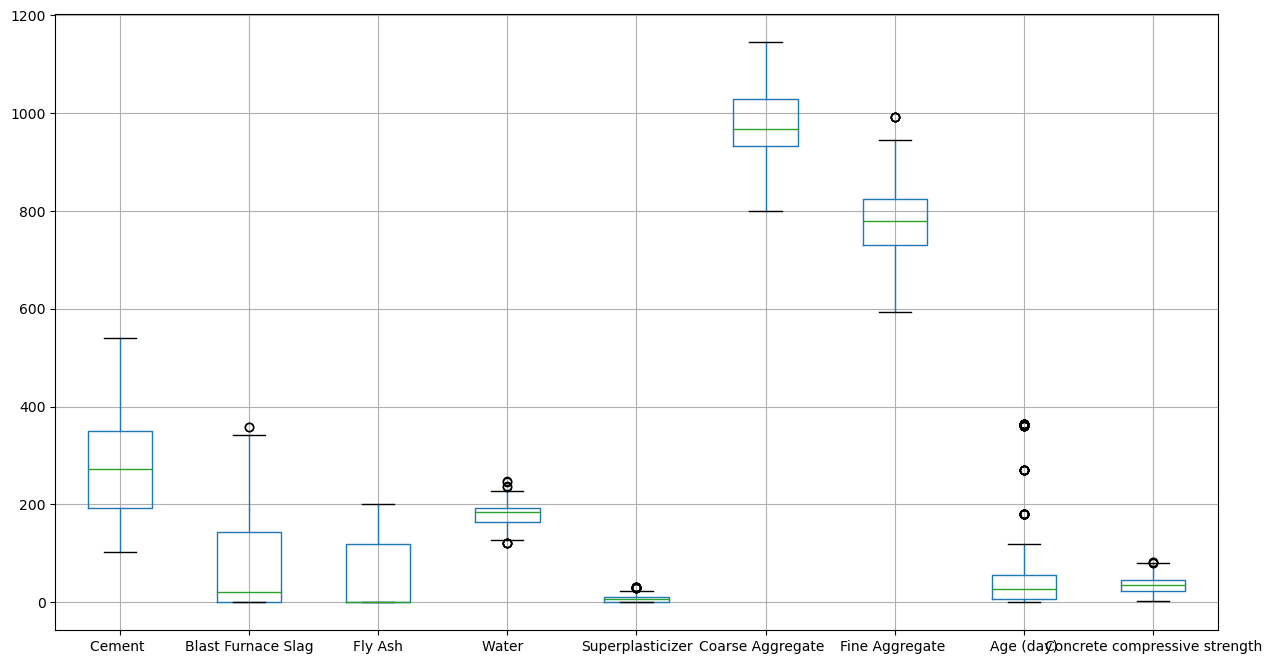

In [39]:
db.boxplot(figsize=(15,8))

In [40]:
# REPLACING OUTLIERS WITH MEDIAN OF THAT PARTICULAR COLUMN:
for cols in db.columns[:-1]:
    Q1=db[cols].quantile(q=.25)
    Q3=db[cols].quantile(q=.75)
    iqr=Q3-Q1
    low=Q1-1.5*(iqr)
    high=Q3+1.5*(iqr)
    db.loc[(db[cols]<low) | (db[cols]>high),cols]=db[cols].median()
    

<AxesSubplot:>

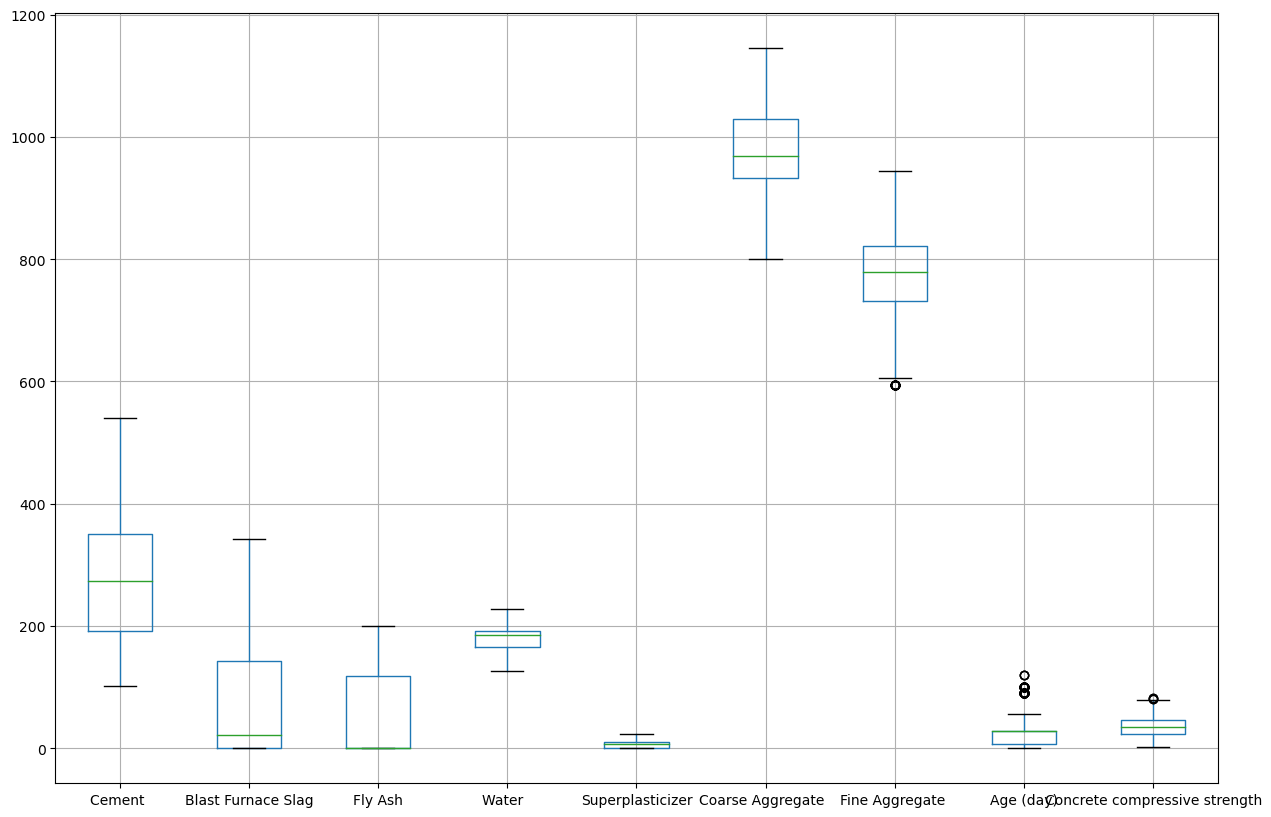

In [41]:
db.boxplot(figsize=(15,10))

# FEATURE ENGINEERING AND MODEL BUILDING:

In [42]:
# SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT ATTRIBUTES:

In [43]:
db.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

In [44]:
X=db.drop('Concrete compressive strength',axis=1)
Y=db['Concrete compressive strength']

In [45]:
from scipy.stats import zscore
Xscaled=X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=db.columns)

<IPython.core.display.Javascript object>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,Y, test_size= 0.3, random_state= 1)
# test size=0.3 means we are going to use 70% of the data for training and 30% of the data for testing
# random_state =1 means we are directing to generate the same random number every time when we run the code for splitting the data into testing and training set:


<IPython.core.display.Javascript object>

# BUILDING DIFFERENT MODELS:

In [47]:
# RANDOM FOREST MODEL

In [48]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [49]:
y_predict=model.predict(X_test)

In [50]:
# Model Performance on Training Data

print(model.score(X_train, y_train))

print((model.score(X_train, y_train)*100)) #if you want to get the  percentage.

0.981742624993205
98.17426249932049


In [51]:
# Model performance on test data:
print((model.score(X_test,y_test)*100))
# my observation : as the model performance is 96.7 % for training set but for testing set 
                # its performance is 84.8 % , so i think the model is overfitted.

87.60064546157395


In [52]:
# same as above
acc_R=metrics.r2_score(y_test, y_predict)
acc_R   # (acc_R) stands for regression accuracy

<IPython.core.display.Javascript object>

0.8760064546157394

In [53]:
print(metrics.mean_squared_error(y_test,y_predict))

<IPython.core.display.Javascript object>

32.49963325576828


In [54]:
#Storing the regression accuracy results for each model in a dataframe for final comparison:

results_1 = pd.DataFrame({'Algorithm':'Random Forest', 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006


# KFOLD CROSS VALIDATION:

In [55]:
k = 20 #(elbow method for choosing k value)

kfold = KFold(n_splits=k)
K_results = cross_val_score(model, X, Y, cv=kfold) #("cv" stands for cross validation)
print(K_results)
accuracy=np.mean(abs(K_results))
print(accuracy)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.58587161 0.83862682 0.40995577 0.95666179 0.76563946 0.85098928
 0.65321026 0.71634181 0.45296553 0.48795634 0.79091235 0.67417798
 0.8798182  0.85919586 0.85893424 0.85403591 0.90564536 0.94749647
 0.88253956 0.9520131 ]


<IPython.core.display.Javascript object>

0.7661493846425459


In [56]:
#Storing the accuracy results for each model in a dataframe for final comparison:

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149


# Gradient Boosting Regressor

In [57]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [58]:
y_predict=model.predict(X_test)

In [59]:
# Model Performance on Training set:

print(model.score(X_train, y_train)*100)

94.79484642544256


In [60]:
# Model Performance on testing set:

print(model.score(X_test, y_test))

0.8819917300235823


In [61]:
acc_G=metrics.r2_score(y_test,y_predict)
acc_G

<IPython.core.display.Javascript object>

0.8819917300235823

In [62]:
print(metrics.mean_squared_error(y_test,y_predict))

<IPython.core.display.Javascript object>

30.930847920315212


In [63]:
#Storing the accuracy results for each model in a dataframe for final comparison:

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boosting Regressor'], 'accuracy': acc_G},index={'3'})
print(gradient_re)
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

                     Algorithm  accuracy
3  Gradient Boosting Regressor  0.881992


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992


# KFOLD CROSS VALIDATION for (Gradient Boosting Regressor):

In [64]:
k = 20 #(elbow method for choosing k value)

kfold = KFold(n_splits=k)
K_results_3 = cross_val_score(model, X, Y, cv=kfold) #("cv" stands for cross validation)
print(K_results_3)
accuracy=np.mean(abs(K_results_3))
print(accuracy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.7189554  0.77603629 0.43838529 0.96369561 0.80753494 0.84783379
 0.69830104 0.67763004 0.58650717 0.50716697 0.81925304 0.65396429
 0.8593902  0.88746382 0.85557328 0.83495927 0.79293535 0.85615712
 0.79391294 0.83151242]


<IPython.core.display.Javascript object>

0.7603584129144908


In [65]:
#Storing the accuracy results for each model in a dataframe for final comparison:

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boosting Regressor k fold'], 'accuracy': accuracy},index={'4'})
print(gradient_k)
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

                            Algorithm  accuracy
4  Gradient Boosting Regressor k fold  0.760358


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358


# Ada Boost Regressor :

In [66]:
from sklearn.ensemble import AdaBoostRegressor

In [67]:
model=AdaBoostRegressor()
model.fit(X_train,y_train)

AdaBoostRegressor()

In [68]:
y_predict=model.predict(X_test)


In [69]:
# Model Performance on Training set:

print(model.score(X_train, y_train)*100)

81.70387642132276


In [70]:
# Model Performance on testing set:

print(model.score(X_test, y_test)*100)

75.47002120795246


In [71]:
acc_Ada=metrics.r2_score(y_test,y_predict)
acc_Ada

<IPython.core.display.Javascript object>

0.7547002120795245

In [72]:
#Storing the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700


# K fold cross Validation for Ada Boost:

In [73]:
k = 20 #(elbow method for choosing k value)

kfold = KFold(n_splits=k)
K_results_4 = cross_val_score(model, X, Y, cv=kfold) #("cv" stands for cross validation)
print(K_results_4)
accuracy=np.mean(abs(K_results_4))
print(accuracy)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.48183221 0.56211091 0.14675001 0.8480876  0.68327746 0.75575288
 0.62175167 0.70156829 0.4542591  0.55576076 0.64380207 0.29423258
 0.46399389 0.70372624 0.65175053 0.6758751  0.58252299 0.59336163
 0.48652508 0.63236871]


<IPython.core.display.Javascript object>

0.5769654851643123


In [74]:
#Storing the accuracy results for each model in a dataframe for final comparison

Ada_k = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index={'6'})
print(Ada_k)
results = pd.concat([results, Ada_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

                    Algorithm  accuracy
6  Ada Boost Regressor k fold  0.576965


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965


# KNN Regressor :

In [75]:
#Checking for different values of neighbors to determine K , 
# here K actually means number of points we are considering as a neighbouring points
from sklearn.neighbors import KNeighborsRegressor
diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  predict_i = knn.predict(X_test)
  diff_k.append(np.mean(predict_i != y_test))
diff_k

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.9579288025889967,
 0.9902912621359223,
 0.9967637540453075,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

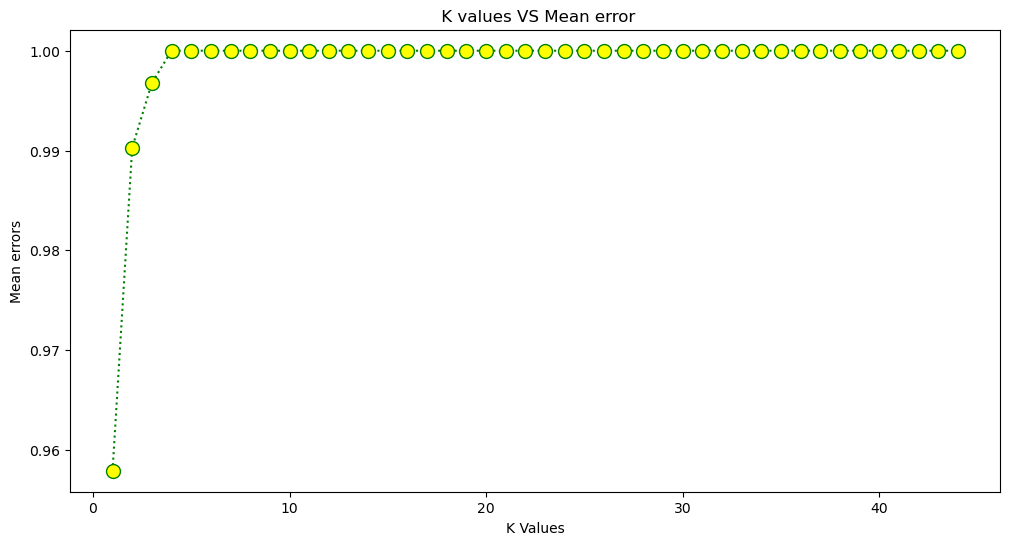

In [76]:
# choosing optimum K value using graph
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='green',linestyle='dotted',marker='o',markerfacecolor='yellow',markersize=10)
plt.title(' K values VS Mean error')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [77]:
# K=3 is an optimum choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [78]:
y_predict=model.predict(X_test)


In [79]:
# model performance on training set :
print(model.score(X_train,y_train)*100)

90.79129283309702


In [80]:
# model performance on testing set :
print(model.score(X_test,y_test)*100)

75.35181554806387


In [81]:
acc_knn=metrics.r2_score(y_test,y_predict)
acc_knn

<IPython.core.display.Javascript object>

0.7535181554806387

In [82]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

64.6047302402677

In [83]:
#Storing the accuracy results for each model in a dataframe for final comparison
KNN_df = pd.DataFrame({'Algorithm':'KNN Regressor', 'accuracy':acc_knn}, index={'7'})
print(KNN_df)
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

       Algorithm  accuracy
7  KNN Regressor  0.753518


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518


# KNN Regressor k fold :

In [84]:
k = 20 #(elbow method for choosing k value)

kfold = KFold(n_splits=k)
K_results_5 = cross_val_score(model, X, Y, cv=kfold) #("cv" stands for cross validation)
print(K_results_5)
accuracy=np.mean(abs(K_results_5))
print(accuracy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.38299628 -1.72401133 -1.62892475  0.84298518  0.5503428   0.72533108
  0.05302906  0.41334709 -0.99216658  0.36395212  0.39836315  0.42325148
  0.60043284  0.37359261  0.66815654  0.57412956  0.73189055  0.8066554
  0.79189936  0.81093487]


<IPython.core.display.Javascript object>

0.6928196309513601


In [85]:
#Storing the accuracy results for each model in a dataframe for final comparison

KNN_kfold = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index={'8'})
print(KNN_kfold)
results = pd.concat([results, KNN_kfold])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

              Algorithm  accuracy
8  KNN Regressor k fold   0.69282


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820


# Bagging Regressor :

In [86]:
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [87]:
y_predict=model.predict(X_test)

In [88]:
# performance of the model on training set :
print(model.score(X_train,y_train)*100)

97.54036175999097


In [89]:
# performance of the model on testing set :
print(model.score(X_test,y_test)*100)

86.79538524943402


In [90]:
# same as above
acc_BR=metrics.r2_score(y_test,y_predict)
acc_BR

<IPython.core.display.Javascript object>

0.8679538524943402

In [91]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

34.61028034541363

In [92]:
#Storing the accuracy results for each model in a dataframe for final comparison

BR_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
print(BR_df)
results = pd.concat([results, BR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

           Algorithm  accuracy
9  Bagging Regressor  0.867954


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954


#  K fold cross Validation for Bagging Regressor :

In [93]:
k = 20
kfold = KFold(n_splits=k)
k_results_6 = cross_val_score(model, X, Y, cv=kfold)
print(k_results_6)
accuracy=np.mean(abs(k_results_6))
print(accuracy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.63518469 0.77179197 0.3145665  0.94603955 0.58767855 0.83029774
 0.61186129 0.66242016 0.51744102 0.45409322 0.76464526 0.61051388
 0.78800384 0.82750442 0.84752004 0.77527977 0.86750364 0.93997114
 0.81396602 0.8892481 ]


<IPython.core.display.Javascript object>

0.7227765382470142


In [94]:
#Storing the accuracy results for each model in a dataframe for final comparison

BR_KFold_df = pd.DataFrame({'Algorithm': 'Bagging Regressor k fold', 'accuracy': accuracy},index={'10'})
print(BR_KFold_df)
results = pd.concat([results, BR_KFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

                   Algorithm  accuracy
10  Bagging Regressor k fold  0.722777


<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# Support Vector Regressor : 

In [95]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [96]:
y_predict=model.predict(X_test)

In [97]:
# performance of the model on training set :
print(model.score(X_train,y_train)*100)

72.96534161238823


In [98]:
# performance of the model on testing set :
print(model.score(X_test,y_test)*100)

65.50336531634045


In [99]:
acc_SVR=metrics.r2_score(y_test,y_predict)
acc_SVR

<IPython.core.display.Javascript object>

0.6550336531634045

In [100]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

90.41825300685895

In [101]:
#Storing the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# K fold cross Validation for Support Vector Regressor :

In [102]:
k = 20
kfold = KFold(n_splits=k)
k_results_7 = cross_val_score(model, X, Y, cv=kfold)
print(k_results_7)
accuracy=np.mean(abs(k_results_7))
print(accuracy)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [ ]:
#Storing the accuracy results for each model in a dataframe for final comparison

SVR_KFold_df = pd.DataFrame({'Algorithm': 'Support Vector Regressor k fold', 'accuracy': accuracy},index={'12'})
results = pd.concat([results, SVR_KFold_df])
results = results[['Algorithm','accuracy']]
results

# XGBoost Regressor :

In [ ]:
pip install xgboost

In [103]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [104]:
y_predict=model.predict(X_test)

In [105]:
# performance of the model on training set :
print(model.score(X_train,y_train)*100)

99.33586923084233


In [106]:
# performance of the model on testing set :
print(model.score(X_test,y_test)*100)

90.24054102439052


In [ ]:
# MY OBSERVATION : you can clearly see that this model is performing quite well for both the training and testing data- 
#                   set and the gap between the score of these two data set is also quite low.

In [107]:
acc_XGB=metrics.r2_score(y_test,y_predict)
acc_XGB

<IPython.core.display.Javascript object>

0.9024054102439053

In [108]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

25.580270045434606

In [109]:
#Storing the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# DesionTreeRegressor :

In [110]:
from sklearn.tree import DecisionTreeRegressor as DTR
model=DTR()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [111]:
y_predict=model.predict(X_test)

In [112]:
# performance of the model on training set :
print(model.score(X_train,y_train)*100)

99.38748100766917


In [113]:
# performance of the model on testing set :
print(model.score(X_test,y_test)*100)
# NOTE: this is an overfitting issue since model is performing excellent in training set but not with testing set

75.11551897483017


In [114]:
acc_DTR=metrics.r2_score(y_test,y_predict)
acc_DTR

<IPython.core.display.Javascript object>

0.7511551897483016

In [115]:
metrics.mean_squared_error(y_test,y_predict)

<IPython.core.display.Javascript object>

65.22408118679407

In [116]:
#Storing the accuracy results for each model in a dataframe for final comparison

DTR_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor '], 'accuracy': [acc_DTR]},index={'14'})
results = pd.concat([results, DTR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# K fold cross Validation for DesionTreeRegressor :

In [117]:
k=20
kfold=KFold(n_splits=k)
results_8=cross_val_score(model,X,Y,cv=kfold)
print(results_8)
accuracy=np.mean(abs(results_8))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[-0.49504652  0.62087891  0.39035563  0.93592757  0.46152854  0.39387572
  0.55121198  0.4401281   0.20318221  0.33624855  0.65208206  0.63728624
  0.65027748  0.73981857  0.7293637   0.52782509  0.92216659  0.96137097
  0.78923043  0.98091249]


<IPython.core.display.Javascript object>

0.6209358664872165

In [118]:
#Storing the accuracy results for each model in a dataframe for final comparison:
DTR_kfold=pd.DataFrame({"Algorithm":"Decision Tree Regressor K fold","accuracy":accuracy},index={15})
results=pd.concat([results,DTR_kfold])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# FEATURE SELECTION :

In [119]:
#printing the feature's importance(that features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                     Importance
Cement                0.309724
Blast Furnace Slag    0.058684
Fly Ash               0.008149
Water                 0.124154
Superplasticizer      0.050608
Coarse Aggregate      0.026854
Fine Aggregate        0.049084
Age (day)             0.372743


In [120]:
# as we can clearly see fro the above cell that Cement, Water and Age are the most important features

In [121]:
#creating a copy of already existing database named as "db" in order to 
#  drop the least important features and work on only the important features
db2=db.copy()

In [122]:
db2.columns

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ',
       'Age (day)', 'Concrete compressive strength'],
      dtype='object')

In [123]:
# droping the least important features and work on only the important features
Z=db2.drop(['Concrete compressive strength','Blast Furnace Slag','Fly Ash','Superplasticizer','Coarse Aggregate  ',
           'Fine Aggregate ',],axis=1)
U=db2['Concrete compressive strength']


In [124]:
# Splitting the Z and U into training and testing set in 70:30 ratio:
Z_train,Z_test, U_train,U_test = train_test_split(Z,U, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [125]:
Z_train = Z_train.apply(zscore)
Z_test = Z_test.apply(zscore)

# DecisionTreeRegressor (after feature selection):

In [127]:
New_Model = DTR()
New_Model.fit(Z_train, U_train)

DecisionTreeRegressor()

In [128]:
#printing the feature's importance(that features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(New_Model.feature_importances_,columns=['Importance'],index=Z_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
            Importance
Cement       0.404192
Water        0.214806
Age (day)    0.381002


In [129]:
U_predict=New_Model.predict(Z_test)

In [130]:
# performance of the model on training set :
print(New_Model.score(Z_train,U_train)*100)

98.74080144393632


In [131]:
# performance of the model on testing set :
print(New_Model.score(Z_test,U_test)*100)

42.82522139346898


In [132]:
# again this is a case of overfitted model...

In [133]:
acc_dt2=metrics.r2_score(U_test,U_predict)
acc_dt2

<IPython.core.display.Javascript object>

0.4282522139346898

In [134]:
metrics.mean_squared_error(U_test,U_predict)

<IPython.core.display.Javascript object>

149.85936005245276

In [135]:
#Storing the accuracy results for each model in a dataframe for final comparison

DT2_df = pd.DataFrame({'Algorithm': ['DecisionTreeRegressor (after feature selection)'], 'accuracy': [acc_dt2]},index={'16'})
results = pd.concat([results, DT2_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


In [136]:
#Let's create our training and testing data again since it has been overriden
x_new=db.drop('Concrete compressive strength',axis=1)
y_new=db['Concrete compressive strength']

In [137]:
x_new_scaled=x_new.apply(zscore)
x_new_scaled_df=pd.DataFrame(x_new_scaled,columns=x_new.columns)

<IPython.core.display.Javascript object>

In [138]:
#Splitting the [x_new] and [y_new] data set into training and testing set in 70:30 ratio
x_new_train,x_new_test, y_new_train,y_new_test = train_test_split(x_new_scaled,y_new, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

# Performing Hyper-Parameter Tuning For DecisionTreeRegressor Model :

In [141]:
DTR_prun_model=DTR(max_depth=4, random_state=1,min_samples_leaf=5)
DTR_prun_model.fit(x_new_train,y_new_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [142]:
#printing the feature's importance(that features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(DTR_prun_model.feature_importances_,
     columns=['Importance'],index=x_new_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
                     Importance
Cement                0.355311
Blast Furnace Slag    0.000000
Fly Ash               0.000000
Water                 0.105940
Superplasticizer      0.036227
Coarse Aggregate      0.000000
Fine Aggregate        0.025032
Age (day)             0.477490


In [143]:
# OBSERVATION : from above cell we can clearly see that Blast Furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate
#                and Fine Aggregate components are not very much contributing in predicting the Concrete compressive strength...

# Plotting The Decision Tree

In [418]:
 #installing "graphviz" library package...
! pip install graphviz  

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00


In [419]:
 #installing "pydot" library package...
! pip install pydot  

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install --upgrade scikit-learn

In [144]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [145]:
feature_cols=x_new_scaled_df.columns
feature_cols

Index(['Cement ', 'Blast Furnace Slag', 'Fly Ash', 'Water  ',
       'Superplasticizer', 'Coarse Aggregate  ', 'Fine Aggregate ',
       'Age (day)'],
      dtype='object')

# Plotting Decision Tree

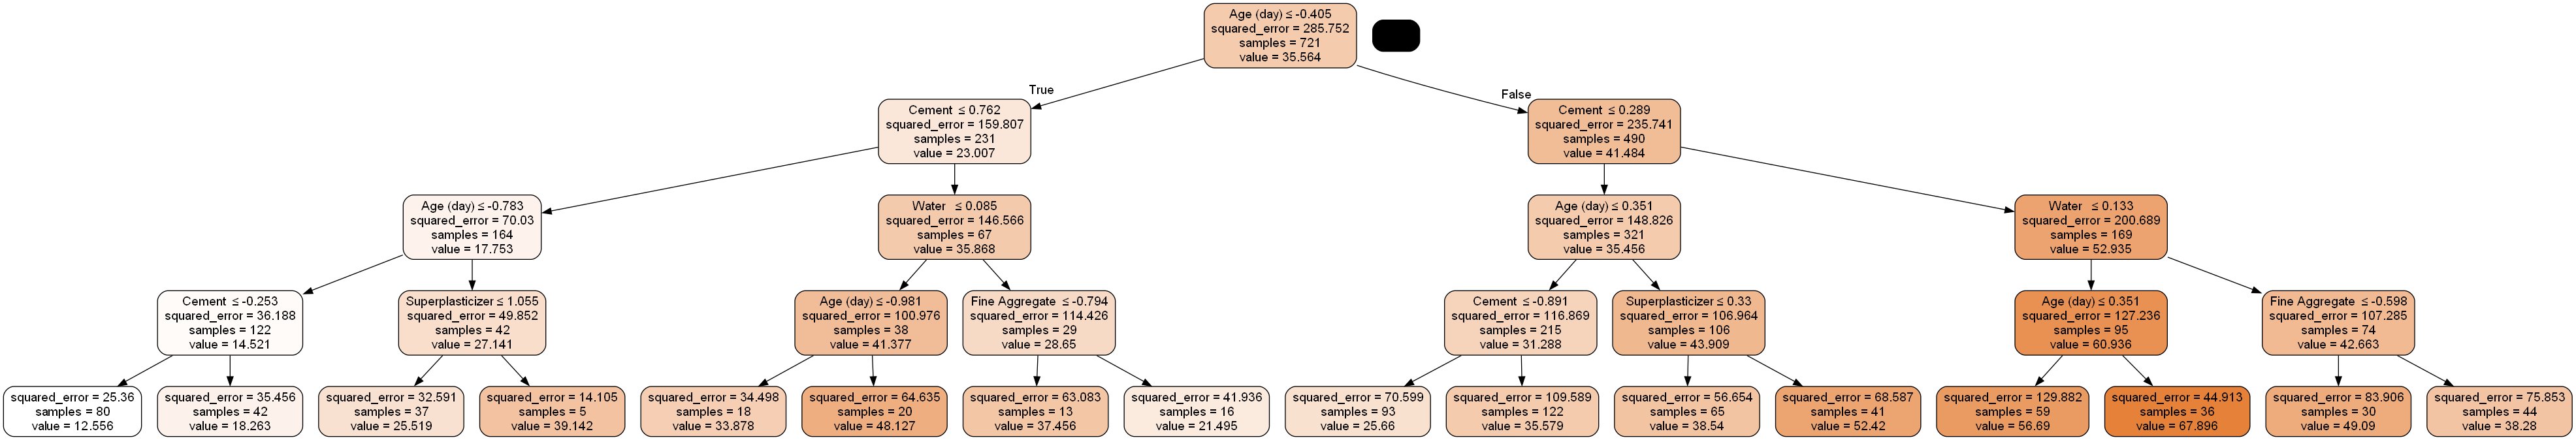

In [146]:
dot_data = StringIO()
export_graphviz(DTR_prun_model,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [147]:
y_new_predict=DTR_prun_model.predict(x_new_test)

In [148]:
# performance of the model on training set :
print(DTR_prun_model.score(x_new_train,y_new_train)*100)

75.84606662476223


In [149]:
# performance of the model on testing set :
print(DTR_prun_model.score(x_new_test,y_new_test)*100)

55.98696064455153


In [150]:
acc_DTR_prun_model=metrics.r2_score(y_new_test,y_new_predict)
acc_DTR_prun_model

<IPython.core.display.Javascript object>

0.5598696064455153

In [151]:
metrics.mean_squared_error(y_new_test,y_new_predict)

<IPython.core.display.Javascript object>

115.36145958976216

In [152]:
#Storing the accuracy results for each model in a dataframe for final comparison

DTR_prun_model_df = pd.DataFrame({'Algorithm': 'Pruned Decision Tree', 'accuracy': acc_DTR_prun_model},index={'17'})
results = pd.concat([results, DTR_prun_model_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# K fold cross validation for Pruned Decision Tree :

In [153]:
k=20
kfold=KFold(n_splits=k)
results_9=cross_val_score(DTR_prun_model,x_new,y_new,cv=kfold)
print(results_9)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.17164568  0.39987414 -0.46578381  0.66857361  0.37280781  0.51104038
 -0.19323413  0.58020513 -0.58432239  0.57935545  0.56391735 -0.19891959
  0.19737439  0.64649167  0.57615108  0.33394213  0.25920471  0.24156746
  0.60077873  0.50780744]


<IPython.core.display.Javascript object>

0.4326498540975009

In [154]:
#Storing the accuracy results for each model in a dataframe for final comparison

DTR_prun_model_kfold_df = pd.DataFrame({'Algorithm': 'Pruned Decision Tree k fold', 'accuracy': accuracy},index={'18'})
results = pd.concat([results, DTR_prun_model_kfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


# Final conclusion on what model to choose among these for better prediction of the "Concrete compressive strength"...

In [155]:
results

,Algorithm,accuracy
1,Random Forest,0.876006
2,Random Forest Regressor k_fold,0.766149
3,Gradient Boosting Regressor,0.881992
4,Gradient Boosting Regressor k fold,0.760358
5,Ada Boost Regressor,0.754700
6,Ada Boost Regressor k fold,0.576965
7,KNN Regressor,0.753518
8,KNN Regressor k fold,0.692820
9,Bagging Regressor,0.867954
10,Bagging Regressor k fold,0.722777


In [ ]:
# Among these 18 different models we can clearly see that :
# 1) Random Forest
# 2) Gradient Boosting Regressor
# 3) Bagging Regressor
# 4) XGBoost Regressor are performing quite well 
# so Finally I will be choosing "XG Boost Regressor" model for the prediction of "Concrete compressive strength"
# since it has highest value of Accuracy that is 90.24 %